In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random

c:\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# load Yolo
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [3]:
labels = []

with open('coco.names', 'r') as f:
  labels = [line.strip() for line in f.readlines()]

In [4]:
len(labels)

80

In [5]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0,255,size = (len(labels),3))

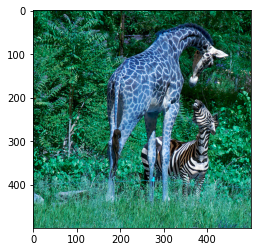

In [24]:
#loading Image:
image = cv2.imread("giraffe.jpg")

plt.imshow(image)

In [25]:
height,width,channels = image.shape

In [26]:
# Detecting objects:

blob = cv2.dnn.blobFromImage(image, 0.00392,(416,416),(0,0,0),True,crop = False)

net.setInput(blob)
output = net.forward(output_layers)
        

In [27]:
# Showing Information On Screen:

boxes = []
confidences = []
class_ids = []

for out in output:
    for detection in out:
        scores= detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence>0.5:
            # Object Detected:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            # Rectangle Coordinates:
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
            

In [28]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(labels[class_ids[i]])
        color = colors[i]
        cv2.rectangle(image,(x,y),(x+w,y+h),color,2)
        cv2.putText(image,label,(x,y+30),font,2,color,3)

In [29]:
cv2.imshow("Project Gurukul",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
cv2.imwrite("./images/detected_img2.jpg" , image)

True